In [ ]:
!wget #provide the link

--2025-03-29 18:07:39--  https://www.dropbox.com/scl/fo/w1rmougpwje9508n7jrnz/ABIhasTtSb_s6sKIpyqNAiY?rlkey=yv6uup50u3rbh2v3etslk6mtu
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce342d07dd3b4c262cdf09ae557.dl.dropboxusercontent.com/zip_download_get/CKNRvHbogFCLVS2WHLhTJgzmbUmPseX1ZY6XtXTg_VQTu3MAaGslPXmygjvGGNnyRfGRqFyqp9eI7ula7R6M9eMBbHcdX0sZ4AUuVO2AFLJZBw# [following]
--2025-03-29 18:07:42--  https://uce342d07dd3b4c262cdf09ae557.dl.dropboxusercontent.com/zip_download_get/CKNRvHbogFCLVS2WHLhTJgzmbUmPseX1ZY6XtXTg_VQTu3MAaGslPXmygjvGGNnyRfGRqFyqp9eI7ula7R6M9eMBbHcdX0sZ4AUuVO2AFLJZBw
Resolving uce342d07dd3b4c262cdf09ae557.dl.dropboxusercontent.com (uce342d07dd3b4c262cdf09ae557.dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:6016:15::a27d:10f
Connecting to uce342d07dd3b4c262cdf09ae557.dl.dropbo

In [ ]:
!unzip /content/ABIhasTtSb_s6sKIpyqNAiY?rlkey=# provide the key

Archive:  /content/ABIhasTtSb_s6sKIpyqNAiY?rlkey=yv6uup50u3rbh2v3etslk6mtu
mapname:  conversion of  failed
   creating: Brain Tumor Data Set/
   creating: Brain Tumor Data Set/Healthy/
   creating: Brain Tumor Data Set/Brain Tumor/
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (2).tif  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (8).jpg  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (4).jpg  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (3).jpg  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (9).tif  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (7).tif  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (6).jpg  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (5).jpg  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (3).tif  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (8).tif  
 extracting: Brain Tumor Data Set/Brain Tumor/Cancer (4).tif  
 extracting:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
ROOT_DIR = "/content/BrainTumorDataSet"

In [ ]:
number_of_images = {dir: len(os.listdir(os.path.join(ROOT_DIR, dir))) for dir in os.listdir(ROOT_DIR)}


In [ ]:
number_of_images.items()

dict_items([('Brain Tumor', 2513), ('Healthy', 2087)])

#we will split the data
70% testing
15% validation
15% testing

In [ ]:
#we will create a folder
def datafolder(p, split):

    if not os.path.exists("./" + p):
        os.mkdir("./" + p)
        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./" + p + "/" + dir)

            # Calculate sample size, ensuring it's not larger than the population
            sample_size = math.floor(split * number_of_images[dir])
            population_size = len(os.listdir(os.path.join(ROOT_DIR, dir)))

            # Adjust if sample size is too large OR if the -5 would make it negative:
            sample_size = min(sample_size, population_size)

            # Select and copy images:
            for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),
                                       size=(sample_size),
                                       replace=False):
                O = os.path.join(ROOT_DIR, dir, img)
                D = os.path.join("./" + p, dir)
                shutil.copy(O, D)
                os.remove(O)
    else:
        print(f"{p} folder exists")

In [ ]:
datafolder("train",0.7)


In [ ]:
datafolder("val",0.15)

val folder exists


In [ ]:
datafolder("test",0.15)

#Model Build

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
#CNN model
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
def preprocessingImage1(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data=ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
  )
  image=image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode='binary'
  )
  return image

In [ ]:
path="/content/train"
train_data=preprocessingImage1(path)

Found 3219 images belonging to 2 classes.


In [ ]:
def preprocessingImage2(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data=ImageDataGenerator(
      rescale=1./255,

  )
  image=image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode='binary'
  )
  return image

In [ ]:
test_data=preprocessingImage2("/content/test")
val_data=preprocessingImage2("/content/val")

Found 689 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [ ]:
#Early stopping and model check point
from keras.callbacks import EarlyStopping, ModelCheckpoint

#early stopping
es=EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')
# model check point
mc=ModelCheckpoint(filepath='best_model.h5',monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

cd=[es,mc]



In [ ]:
#training the model
hs=model.fit(
    train_data,
    steps_per_epoch=8,
    epochs=30,
    verbose=1,
    callbacks=cd,
    validation_data=val_data,
    validation_steps=16
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.6594 - loss: 0.6462
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 440ms/step - accuracy: 0.6547 - loss: 0.6459 - val_accuracy: 0.6667 - val_loss: 0.7765
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.6406 - loss: 0.5989
Epoch 2: val_accuracy did not improve from 0.66667
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 480ms/step - accuracy: 0.6449 - loss: 0.5980 - val_accuracy: 0.6000 - val_loss: 0.8319
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.6820 - loss: 0.5968
Epoch 3: val_accuracy did not improve from 0.66667
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - accuracy: 0.6813 - loss: 0.5965 - val_accuracy: 0.5333 - val_loss: 0.8381
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.6836 - loss: 0.5880
Epoch 4: val_accuracy did not improve from 0.66667
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 360ms/step - accuracy: 0.6871 - loss: 0.5854 - val_accuracy: 0.5333 - val_loss: 0.8856
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.6878 - loss: 0.5533
Epoch 5: val_accuracy did not improve from 0.66667


In [ ]:
#Model graphical interpretation
h=hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

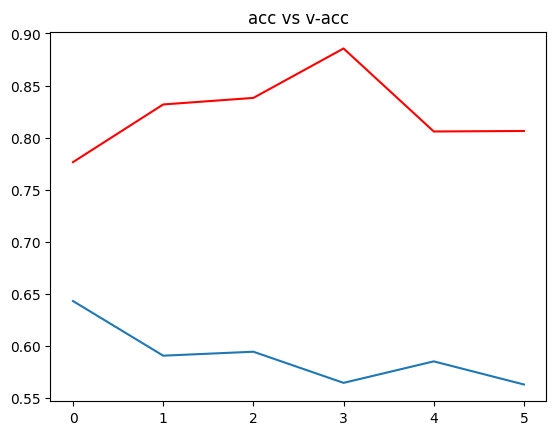

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title('acc vs v-acc')
plt.show()

In [ ]:
#model Acuraccy
from keras.models import load_model
model=load_model('/content/best_model.h5')

In [ ]:
acc=model.evaluate(test_data)[1]
print(f"The accuracy of the model is {acc*100}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.6181 - loss: 0.6859
The accuracy of the model is 62.40928769111633%


In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [ ]:
path="/content/BrainTumorDataSet/Brain Tumor/Cancer (1014).jpg"
img=load_img(path, target_size=(224,224))
input_arr=img_to_array(img)/255
input_arr.shape
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)[0][0]
pred
if pred==0:
  print("The person has brain tumor")
else:
  print("The person does not have brain tumor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The person does not have brain tumor
